# try a nearest neighbor approach

In [1]:
# custom function to generate the prediction in the format to submit to kaggle
def gen_submission_df(y_pred):
    df_pred = pd.DataFrame(y_pred, columns=['Label']).reset_index().rename(columns={'index':'ImageId'})
    df_pred.ImageId += 1
    return df_pred

In [2]:
#import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [3]:
df_train = pd.read_csv('../data/train_14x14.csv', index_col=0)
df_sub = pd.read_csv('../data/test_14x14.csv', index_col=0)

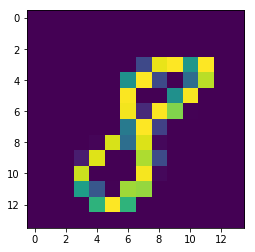

In [4]:
im_index = 5
first_image = df_train.iloc[30,1:].values.reshape(14,14)
plt.imshow(first_image)
plt.show()

In [5]:
sample_1k = df_train
X, y = sample_1k.drop(columns=['label']), sample_1k.label
X_sub = df_sub
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

C:\Users\Alexandre\Anaconda3\envs\ldsa\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


# Simple Knn with k=5

In [6]:
knn = KNeighborsClassifier(n_jobs=-1, n_neighbors=5)

#training
knn.fit(X_train, y_train)

#predicting
accuracy_score(y_test, knn.predict(X_test))

0.9565113879850805

In [7]:
# retrain knn with all the data
knn.fit(X, y)
knn_pred = knn.predict(X_sub)
df_knn_pred = gen_submission_df(knn_pred)

In [9]:
df_knn_pred.to_csv('../output/pred_knn_14x14_10k.csv', index=False)

# KNN using cosine similarity

In [8]:
normalize = lambda row: row/np.sqrt(np.dot(row,row))
X_norm = X.apply(normalize, axis = 1)
X_train_cos = X_train.apply(normalize, axis = 1)
X_test_cos = X_test.apply(normalize, axis = 1)
X_sub = df_sub.apply(normalize, axis = 1)

In [11]:
knn_cos = KNeighborsClassifier(n_jobs=-1, n_neighbors=10)

#training
knn_cos.fit(X_train_cos, y_train)

#predicting
accuracy_score(y_test, knn_cos.predict(X_test_cos))

0.9607174033806841

In [10]:
# retrain knn with all the data
knn.fit(X, y)
knn_pred = knn.predict(X_sub)
df_knn_pred = gen_submission_df(knn_pred)